# **Avance II. Producto Inegrador de Aprendizaje**

### Equipo 02 - Grupo 002

### Frecuencia: Miércoles 7pm-10pm

### Integrantes:
#### 1802920	Juarez Rodríguez Flor Karina
#### 1815973	Mendoza Álvarez Pilar Abigail 
#### 1802473	Ordaz Ruiz Margarita


# **“Suicide Rates Overview 1985 to 2016”**

## Descripción de los datos

El conjunto de datos que muestra la base de datos fue extraído de otros cuatro conjuntos de datos vinculados por tiempo y lugar, y se creó con la finalidad de encontrar señales correlacionadas con el aumento de las tasas de suicidio entre diferentes cohortes a nivel mundial, en todo el espectro socioeconómico.

Los datos se muestran en formato de tabla, la cual cuenta con 27,820 filas y 12 columnas con las siguientes descripciones: país (donde ocurrieron los suicidios), año (año en que ocurrieron los suicidios), sexo (contiene los valores “male” y female”), grupo de edad (rango de edad de 10 años de las personas que se suicidaron), recuento de suicidios (número de suicidios ocurridos), población (número de habitantes en ese año), tasa de suicidio (número de suicidios ocurridos entre la población divida entre mil), composite key de país-año (muestra el país seguido por el año), índice de desarrollo humano (HDI) por año (porcentaje), PIB por año, PIB per cápita (cantidades en dólares) y generación (promedio de agrupación de edad, nombre de la generación de las personas que se suicidaron). 

Lo primero que necesitamos para comenzar a trabajar con la base de datos es importar las librerías que nos ayudarán en el proceso de limpieza de datos y leer nuestra base da datos, nuestro tipo de archivo es un csv *(Coma Separated Value)*, para esto ocupamos el siguiente código:

In [2]:
import pandas as pd
import numpy as np

datos = pd.read_csv("SUICIDIOS.csv")

La función *shape* nos devuelve (filas,columnas) con las que cuenta nuestra base de datos.

In [3]:
datos.shape

(27820, 12)

In [4]:
datos.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')

In [5]:
print(datos.age.unique())
print(len(datos.age.unique()))

['15-24 years' '35-54 years' '75+ years' '25-34 years' '55-74 years'
 '5-14 years']
6


In [6]:
print(datos.country.unique())
print(len(datos.country.unique()))

['Albania' 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba' 'Australia'
 'Austria' 'Azerbaijan' 'Bahamas' 'Bahrain' 'Barbados' 'Belarus' 'Belgium'
 'Belize' 'Bosnia and Herzegovina' 'Brazil' 'Bulgaria' 'Cabo Verde'
 'Canada' 'Chile' 'Colombia' 'Costa Rica' 'Croatia' 'Cuba' 'Cyprus'
 'Czech Republic' 'Denmark' 'Dominica' 'Ecuador' 'El Salvador' 'Estonia'
 'Fiji' 'Finland' 'France' 'Georgia' 'Germany' 'Greece' 'Grenada'
 'Guatemala' 'Guyana' 'Hungary' 'Iceland' 'Ireland' 'Israel' 'Italy'
 'Jamaica' 'Japan' 'Kazakhstan' 'Kiribati' 'Kuwait' 'Kyrgyzstan' 'Latvia'
 'Lithuania' 'Luxembourg' 'Macau' 'Maldives' 'Malta' 'Mauritius' 'Mexico'
 'Mongolia' 'Montenegro' 'Netherlands' 'New Zealand' 'Nicaragua' 'Norway'
 'Oman' 'Panama' 'Paraguay' 'Philippines' 'Poland' 'Portugal'
 'Puerto Rico' 'Qatar' 'Republic of Korea' 'Romania' 'Russian Federation'
 'Saint Kitts and Nevis' 'Saint Lucia' 'Saint Vincent and Grenadines'
 'San Marino' 'Serbia' 'Seychelles' 'Singapore' 'Slovakia' 'Slovenia'
 'South 

In [7]:
print(datos.year.unique())
print(len(datos.year.unique()))

[1987 1988 1989 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002
 2003 2004 2005 2006 2007 2008 2009 2010 1985 1986 1990 1991 2012 2013
 2014 2015 2011 2016]
32


In [8]:
print(datos.generation.unique())
print(len(datos.generation.unique()))

['Generation X' 'Silent' 'G.I. Generation' 'Boomers' 'Millenials'
 'Generation Z']
6


In [9]:
datos.dtypes

country                object
year                    int64
sex                    object
age                    object
suicides_no             int64
population              int64
suicides/100k pop     float64
country-year           object
HDI for year          float64
 gdp_for_year ($)      object
gdp_per_capita ($)      int64
generation             object
dtype: object

## Justificación del uso de datos

La elección de esta base de datos se debió a que nos llamó la atención que tratara sobre el suicidio dado que es un tema muy importante y del cuál se debería de hablar más para saber de él y tratar de prevenirlo, además, dado que estamos atravesando una pandemia y muchas personas nos encontramos en confinamiento los problemas de salud mental se vieron incrementados y entre ellos se encuentra el suicidio. Luego de que abrimos y analizamos un poco más la base de datos vimos que aparte de ser un gran tema el que trata, tenía mucha información con la cuál trabajar y esto nos beneficiaría a la hora de elegir nuestro objetivo. 

Esperamos que trabajar con este conjunto de datos nos ayude a entender más sobre el tema del suicidio y los diferentes factores que influyen en él para así poder crear un poco más de conciencia y ver cómo esto se puede implementar en los programas sociales que existen para la prevención de este.

## Objetivos

Nuestro objetivo principal se basa en que, se observan variaciones en las tasas de suicidios, y queremos encontrar si existe relación alguna entre las variables que se presentan en la base de datos que se utilizará a lo largo del proyecto (presentadas como columnas), y determinar cuáles son aquellas características que podrían ser factores en común en los que cuales pueden enfocarse alternativas y/o programas sociales con la finalidad de decrementar en la medida de lo posible estas tasas.  

Además de nuestro objetivo principal, también queremos enfocarnos en un objetivo secundario el cual sería investigar si los tiempos de crisis son un factor detonante a la alteración de las tasas de suicidio, incluyendo también la región/país en la que se encuentren. 

## Limpieza de Datos

Una vez explicada nuesta base de datos y lo que queremos lograr con ella iniciaremos con la limpieza de datos y lo primero que queremos hacer es ver nuestros datos y con el siguiente código vamos a mostrar los primeros 5 renglones de nuestra base de datos sin manipulación.

In [10]:
datos.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


El siguiente paso es eliminar las columnas que no necesitamos, para poder optimizar el código, en este caso nosotras decidimos eliminar la columna  _**population**_ esto debido a que ya tenemos el porcentaje de suicidios por población así que se nos hizo redundante, la columna _**country-year**_ porque al igual que la columna *population* es redundante, debido a que ya tenemos tanto el país como el año,  _**HDI for year**_ debido a que no nos es últil para nuestros objetivos y la columna _**gdp_for_year**_ esto porque preferimos basarnos en la columna _**gdp_per_capita**_.

Para esto utilizamos la función *drop()*, cabe mencionar que estos cambios decidimos almacenarnos en otra variable, para poder seguir teniendo nuestros datos originales.

In [11]:
ds = datos.drop(['country-year','population',' gdp_for_year ($) ','HDI for year'],axis = 1)
ds.head()

,country,year,sex,age,suicides_no,suicides/100k pop,gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,6.71,796,Generation X
1,Albania,1987,male,35-54 years,16,5.19,796,Silent
2,Albania,1987,female,15-24 years,14,4.83,796,Generation X
3,Albania,1987,male,75+ years,1,4.59,796,G.I. Generation
4,Albania,1987,male,25-34 years,9,3.28,796,Boomers


Ahora vamos a cambiarle el nombre a las columnas para que nos sea más fácil manipular los datos.

In [12]:
ds.rename(columns={'suicides/100k pop':'porcentaje_suicidios',
                     'gdp_per_capita ($)':'per_capita'},
               inplace=True)

ds.head()

,country,year,sex,age,suicides_no,porcentaje_suicidios,per_capita,generation
0,Albania,1987,male,15-24 years,21,6.71,796,Generation X
1,Albania,1987,male,35-54 years,16,5.19,796,Silent
2,Albania,1987,female,15-24 years,14,4.83,796,Generation X
3,Albania,1987,male,75+ years,1,4.59,796,G.I. Generation
4,Albania,1987,male,25-34 years,9,3.28,796,Boomers


Lo siguiente es ver si nuestra base contiene datos nulos, a simple vista no se ve ninguno, pero lo verficamos con la siguiente función:

In [13]:
ds.isnull().any()

country                 False
year                    False
sex                     False
age                     False
suicides_no             False
porcentaje_suicidios    False
per_capita              False
generation              False
dtype: bool

Ahora procederemos a guardar estos datos en un nuevo archivo csv.

In [14]:
ds.to_csv('Datos_Suicidios_limpios.csv', index=False)

Como hemos visto tenemos muchos datos y esto nos dificulta la visualización de los mismos así que decidimos agrupar los datos por edades, esto porque nos interesa ver como es que varían los números de suicidios de acuerdo a las edades. Para esto primero vemos cuales son los valores únicos de edades.

In [15]:
edad = ds.age.unique()
print(edad)

['15-24 years' '35-54 years' '75+ years' '25-34 years' '55-74 years'
 '5-14 years']


Después con un ciclo for le asignamos cada agrupación de datos por rango de año a los elementos de una lista.

In [16]:
col = []
for i in range(0,6):
    col.append(ds[ds['age']==edad[i]])

col[0].head()

,country,year,sex,age,suicides_no,porcentaje_suicidios,per_capita,generation
0,Albania,1987,male,15-24 years,21,6.71,796,Generation X
2,Albania,1987,female,15-24 years,14,4.83,796,Generation X
13,Albania,1988,male,15-24 years,17,5.33,769,Generation X
17,Albania,1988,female,15-24 years,8,2.71,769,Generation X
28,Albania,1989,male,15-24 years,12,3.71,833,Generation X


## Estadística básica

- Para la estadística básica decidimos usar la función *describe()* dado que ésta nos arroja un resumen estadístico de una columna que en este caso fue la de *suicides_no*

In [17]:
ds['suicides_no'].describe()

count    27820.000000
mean       242.574407
std        902.047917
min          0.000000
25%          3.000000
50%         25.000000
75%        131.000000
max      22338.000000
Name: suicides_no, dtype: float64

- Lo que nos pareció más relevante de este resumen estadístico fueron los valores mínimo y máximo ya que nos muestra que los datos tiene mucha variabilidad, lo que nos reafirma que es más conveniente trabajar por agrupaciones.

- También decidimos aplican la función *skew()* para obtener el valor de asimetría de la columna *suicides_no*

In [18]:
ds['suicides_no'].skew()

10.352910335856805

- Como el valor de asimetría es mayor que 1 y por lo tanto positivo, podemos decir que la columna tiene una distribución extremadamente sesgada a la izquierda y ésto se confirmará con las gráficas.

## Visualización de datos

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

En la siguiente gráfica de pastel buscamos visualizar primeramente como se reparten nuestros datos en cuanto a las generaciones:

Text(0, 0.5, 'Generación')

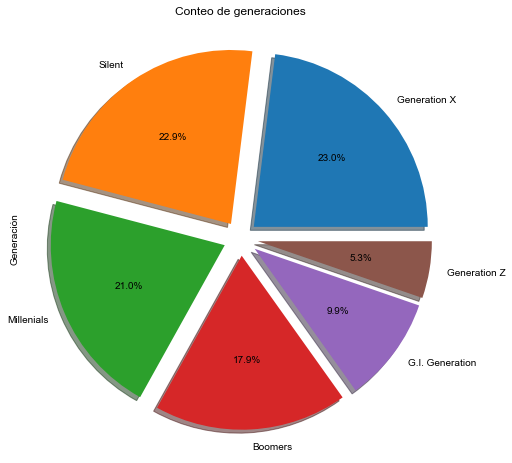

In [20]:
f,ax=plt.subplots(1,1,figsize=(18,8))

ds['generation'].value_counts().plot.pie(explode=[0.1,0.1,0.1,0.1,0.1,0.1],autopct='%1.1f%%',shadow=True)
color = sns.color_palette("husl", 6)
sns.set(style="darkgrid")
plt.title('Conteo de generaciones')
plt.ylabel('Generación')

Ahora buscaremos los paises con mayor numero de suicidios, para evaluar el valor máximo, y para esto nos apoyaremos de una gráfica de barras y un mapa. 

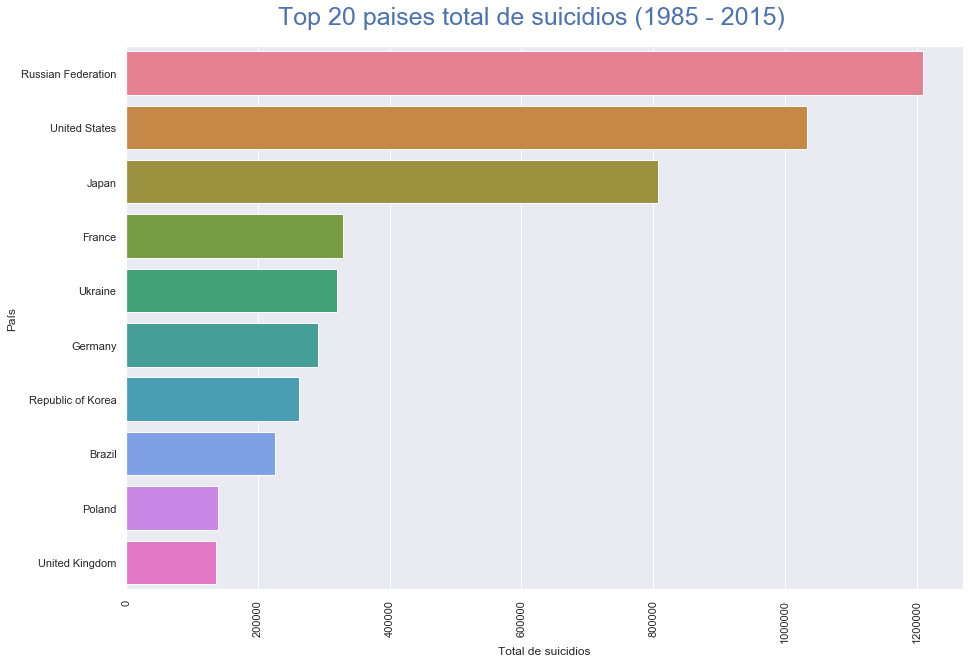

In [21]:
Totalpais = ds.groupby(by=['country']).agg({'suicides_no': ['sum']})
Totalpais.columns = ['Tsuicidios']
Totalpais.reset_index(inplace=True)
Totalpais = Totalpais.sort_values(by=['Tsuicidios'], ascending=False).head(10)


color = sns.color_palette("husl", 10)
sns.set(style="darkgrid")
plt.figure(figsize=(15, 10))
sns.barplot(x='Tsuicidios', y='country', data=Totalpais, palette=color)
plt.xticks(rotation=90)


plt.figtext(.5,.91,'Top 20 paises total de suicidios (1985 - 2015)', color='b', fontsize=25, ha='center')
plt.xlabel('Total de suicidios')
plt.ylabel('País')
plt.show()

In [37]:
#para este gráfico se INSTALA e IMPORTA la libreria plotly 
mapita = ds.groupby(by=['country']).agg({"suicides_no": ['sum']})
mapita.columns = ['total_suicidios']
mapita.reset_index(inplace=True)
mapita

fig = px.choropleth(mapita, locations="country", locationmode='country names',
                    color="total_suicidios", 
                    hover_name="country", 
                    color_continuous_scale='sunset')

fig.update_layout(
    title="Gráfica 2: Mapa de suicidios (1985 - 2015)",
    font=dict(
        family="Courier New, monospace",
        size=18,
        color="RebeccaPurple"
    )
)

fig.show()

Como vemos que Rusia es el país con más suicidios ahora decidimos buscar cual es el año en el cual hubo más suicidios.

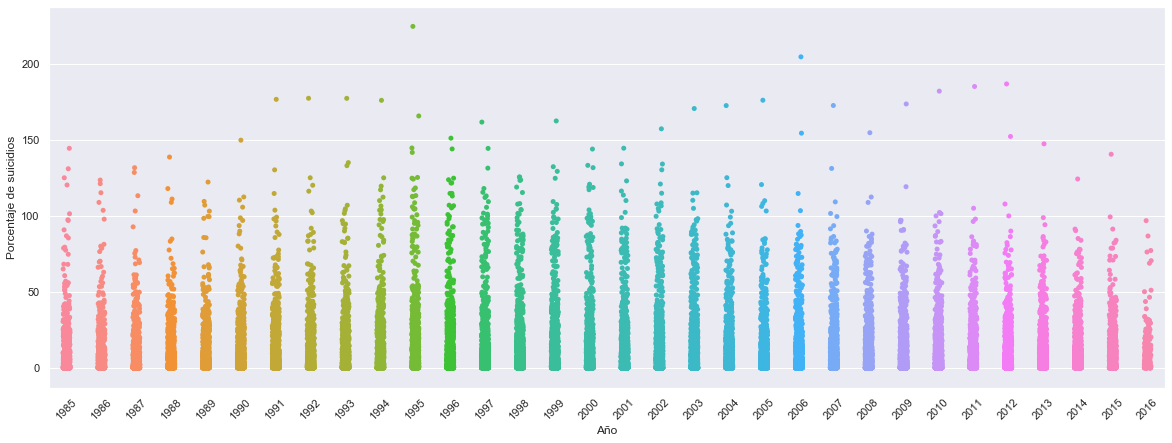

In [23]:
plt.figure(figsize=(20,7))
sns.stripplot(x="year",y='porcentaje_suicidios',data=ds)
plt.xlabel('Año')
plt.ylabel('Porcentaje de suicidios')
plt.xticks(rotation=45)
plt.show()

Text(0, 0.5, 'Numero suicidios')

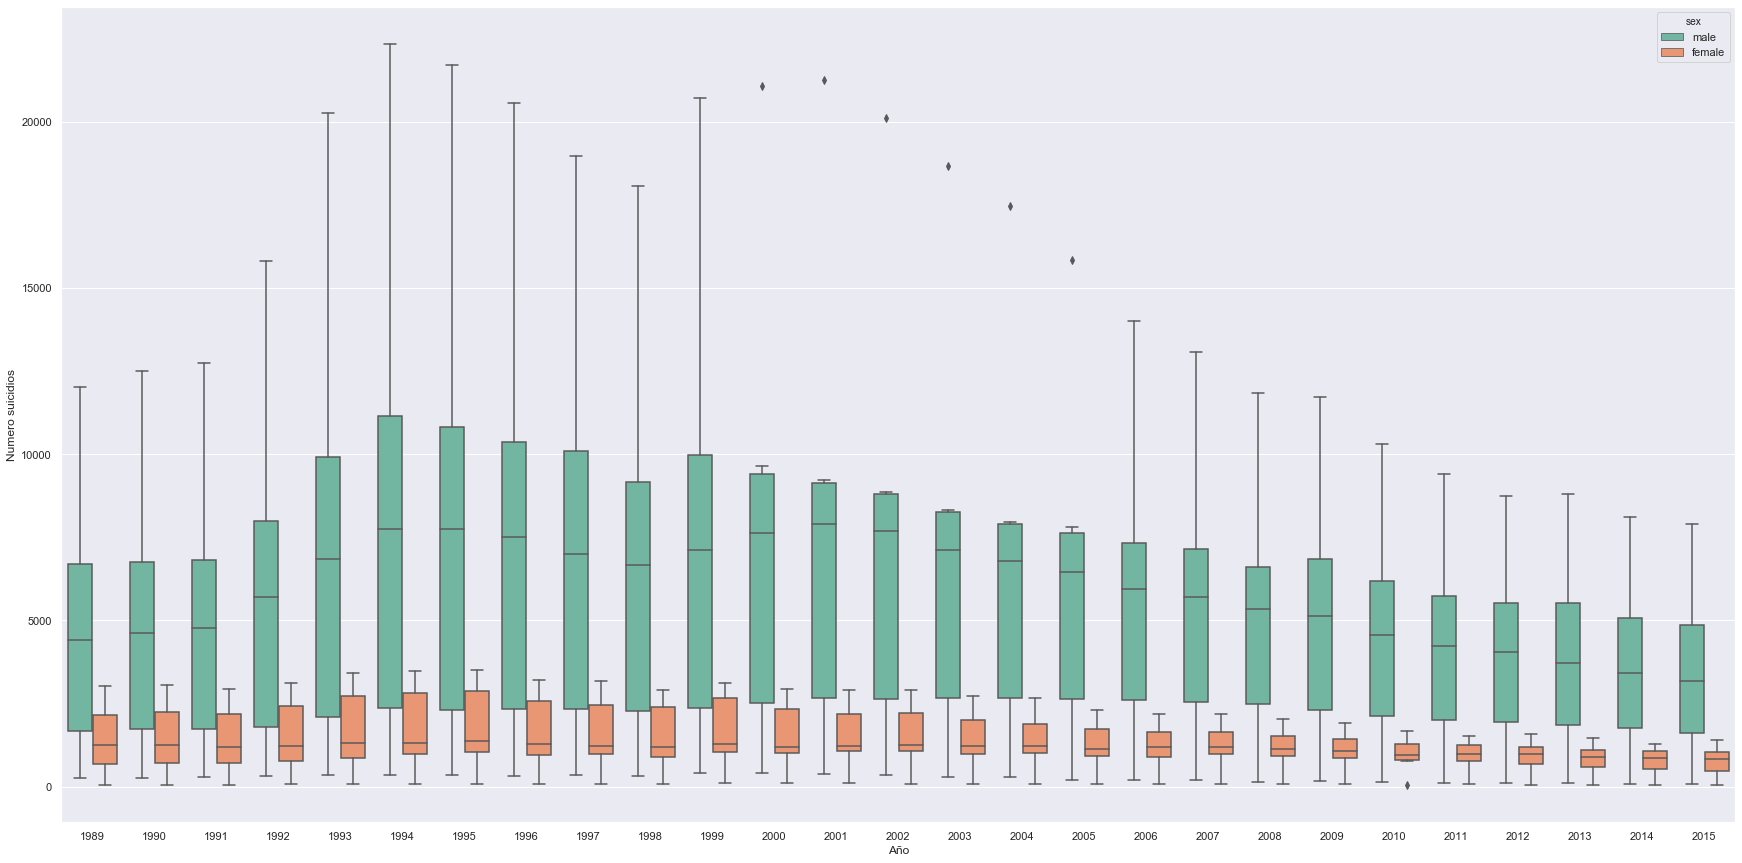

In [24]:
#Suicidios por genero de la Federación Rusa
f, ax = plt.subplots(1,1, figsize=(30,15))
ax = sns.boxplot(x='year', y='suicides_no',hue='sex', data=ds[ds['country']=='Russian Federation'],palette='Set2')
sns.set(style="darkgrid")
plt.xlabel('Año')
plt.ylabel('Numero suicidios')

Esto que hicimos previamente nos ayudará para poder investigar desde un punto más especifico, el contexto en el que se vivió en los años con un mayor numero de suicidios en Rusia, como en el año 1994, para determinar si existieron algunas situaciones que detonaran este incremento. Esto con el fin, de poder tener una conclusión 

Y, ahora para intentar verlo desde otra perspectiva, haremos una serie de gráficos con un enfoque de dividir nuestros datos por rangos de edades y separados también por sexo ya que con el gráfico anterior podemos ver como si existe una diferencia considerable

Text(0, 0.5, 'Numero suicidios')

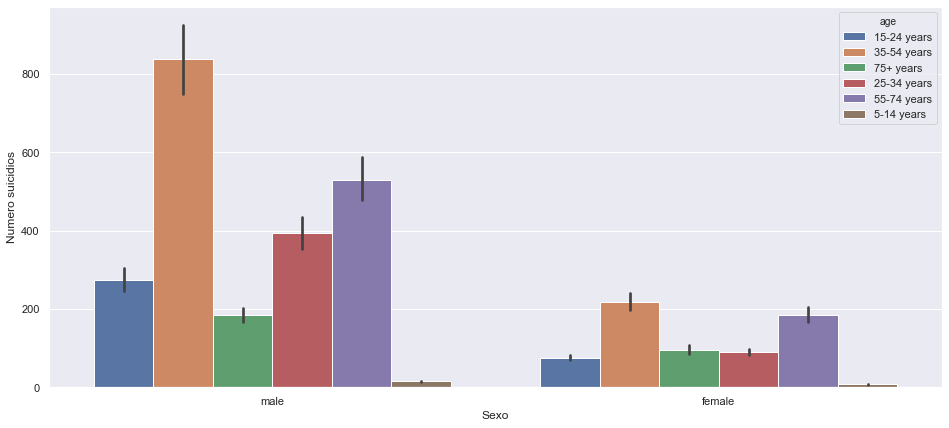

In [25]:
plt.figure(figsize=(16,7))
gb_edad = sns.barplot(x = 'sex', y = 'suicides_no', hue = 'age',data = ds)
plt.xlabel('Sexo')
plt.ylabel('Numero suicidios')

Como podemos ver en el gráfico anterior, según los datos que estamos analizando, los hombres son el género con un mayor número de suicidios

C:\Users\JLN\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning:

by argument to sort_index is deprecated, please use .sort_values(by=...)



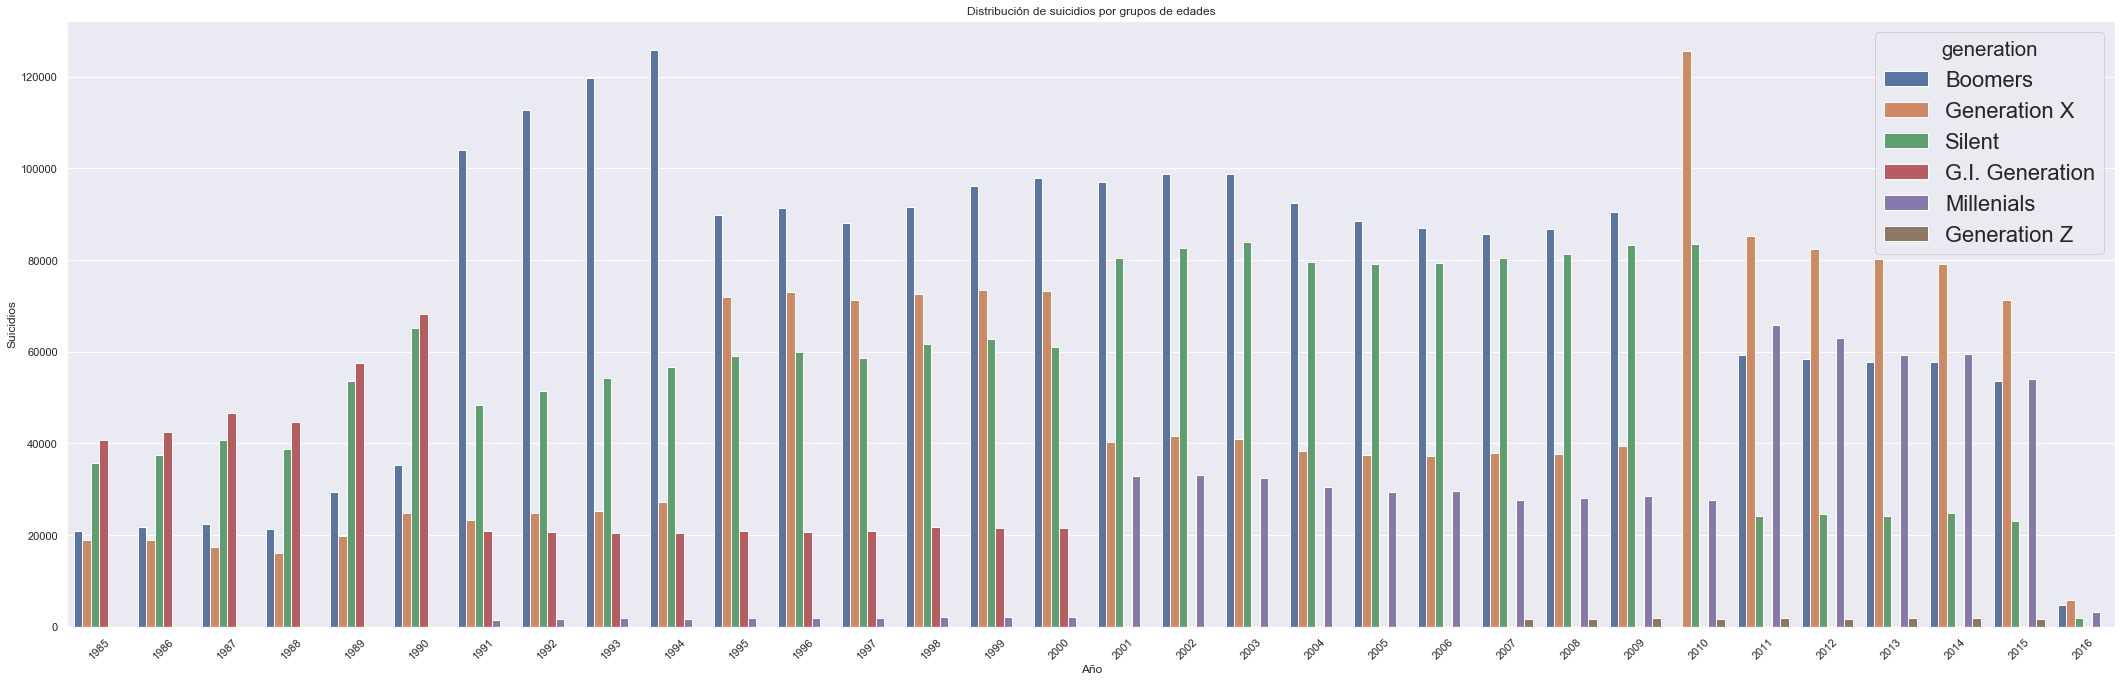

In [26]:
S_year = pd.DataFrame(ds['suicides_no'].groupby([ds['generation'],ds['year']]).sum())
S_year = S_year.reset_index().sort_index(by='suicides_no',ascending=False)
yr = S_year
fig = plt.figure(figsize=(30,10))
plt.title('Distribución de suicidios por grupos de edades')

sns.set(font_scale=2)
sns.barplot(y='suicides_no',x='year',hue='generation',data=yr,palette='deep');
plt.ylabel('Suicidios')
plt.xlabel('Año')
plt.xticks(rotation=45)
plt.tight_layout()

Según esta gráfica que separamos por generaciones, vemos que hay dos puntos los cuales vale la pena resaltar, en 1994 hubo mayor incidencia por parte de la generación "Boomers" y en 2010 por parte de la  generación X. Se puede apreciar que el primero coincide con los primeros datos analizados, y ahora agregamos otro punto el cual investigar que será: ¿qué pasó con la generación X en el año 2010?

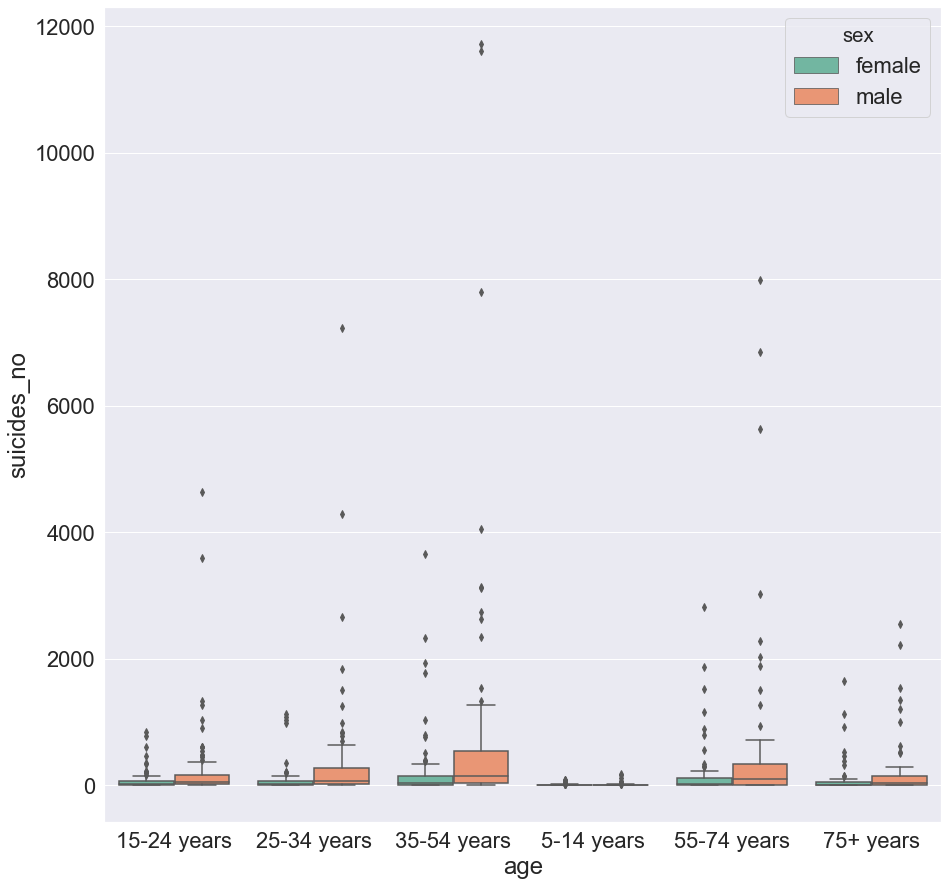

In [27]:
#Suicidios por genero de la Federación Rusa
#ax = sns.boxplot(x='age', y='suicides_no',hue='sex', data=ds[ds['country']=='Russian Federation'],palette='Set2')

# podemos cambiarlo a los boxplots de la generación x en el año 2010 y la generación de Boomers en el año 1994
f, ax = plt.subplots(1,1, figsize=(15,15))
ax = sns.boxplot(x='age', y='suicides_no',hue='sex', 
                 data=ds[ds['year']==2009],
                 palette='Set2')

In [28]:
#Suicidios por genero de la Federación Rusa
bxcol=[col[5],col[0]]
bxcol[0].head()
f, ax = plt.subplots(1,2, figsize=(20,10))

sns.boxplot(x='age', y='suicides_no', hue='sex',data=bxcol[0][bxcol[0]['country']=='Russian Federation'],
                 data=bxcol[0][bxcol[0]['country']=='Russian Federation'],ax=ax[0],
                 palette='Set2')
sns.boxplot(x='age', y='suicides_no', hue='sex',
                 data=bxcol[1][bxcol[1]['country']=='Russian Federation'],ax=ax[1],
                 palette='Set2')


SyntaxError: keyword argument repeated (<ipython-input-28-31ca1e7e72ea>, line 7)

Lo que quisimos hacer con este gráfico fue solamente separar también por sexo los resultados que ya habiamos previsto en los gráficos anteriores, y de esta forma poder visualizarlo más detallado

In [ ]:
s_edades_year = sns.catplot('sex','suicides_no',hue='age',col='year',data=ds,kind='bar',col_wrap=3)

Por ultimo, también consideramos importante (nuestro segundo objetivo) el buscar si afectaba los recursos económicos con los que se cuenta en cada país, así como también mostrar una gráfica individual de dispersión para los paises con mayor número de suicidios

In [ ]:
gdp_percapita = ds.groupby(by=['country', 'year', 'sex', 'per_capita']).agg({"suicides_no": ['sum']})
gdp_percapita.columns = ["totalsuicide"]
gdp_percapita.reset_index(inplace=True)

gdp_percapita

gdp_percapita_cng = gdp_percapita[gdp_percapita['totalsuicide'] < 40000]
plt.figure(figsize=(15, 10))
sns.scatterplot(x="per_capita", y="totalsuicide", hue="sex", data=gdp_percapita_cng)

plt.figtext(.5,.91,'Suicidios - PIB per capita (1985 - 2015)', color='b', fontsize=25, ha='center')
plt.ylabel('Total de suicidios')
plt.xlabel('PIB per capita')
plt.show()
plt.show()

In [ ]:
plt.figure(figsize=(30, 15))
paises = ['Russian Federation', 'United States', 'Japan', 'France']
for i, column in enumerate(paises):
    plt.subplot(2, 2, i+1)

    t4paises_gdp_pc = ds.groupby(by=['country', 'year', 'per_capita']).agg({"suicides_no": ['sum']})
    t4paises_gdp_pc.columns = ["total_suicide"]
    t4paises_gdp_pc.reset_index(inplace=True)
   
    gdp_cn = t4paises_gdp_pc[t4paises_gdp_pc['country'] == column]

    sns.scatterplot(x="per_capita", y="total_suicide", data=gdp_cn)
    plt.title(f"{column} total de suicidios -PIB per capita (1985 - 2015)")
    plt.xlabel('PIB per capita')
    plt.ylabel('Total de suicidios')
    
plt.figtext(.5,.91,'Top 4 paises PIB per capita (1985 - 2015)', color='b', fontsize=25, ha='center')